# 画像を扱う
## 目的
* ここでは画像ファイルを読み込む方法，表示する方法，保存する方法を学ぶ
* 次の関数の使い方を学ぶ : <A HREF="http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=cv2.imre#cv2.imread" target="_blank">cv2.imread()</A>,<A HREF="http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=cv2.imshow#cv2.imshow" target="_blank">cv2.imshow()</A> , <A HREF="http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=cv2.imwrite#cv2.imwrite" target="_blank">cv2.imwrite()</A>
*  さらに，Matplotlibを使った画像の表示方法も学ぶ

##  Using OpenCV
### 画像を読み込む
画像ファイルを読み込むには `cv2.imread(path, option)` 関数を使う．これはNumpyの`array`を返す

1. 第1引数 path: 画像ファイルが作業ディレクトリ内に保存されている場合はファイル名のみを指定し，そうでない場合は絶対パスか適切な相対パスで指定する．<BR>
OpenCVで扱えるファイルの拡張子(つまり、画像のコーディング方法)は次のいずれか:
```
jpg, jpeg, jpe, jp2, png, webp, bmp, pbm, pgm, ppm, 
pxm, pnm,  sr,  ras, tiff, tif, exr, hdr, pic, dib
```
第2引数 option は画像の読み込み方法を指定するためのフラグを指定：次のいずれか:
    * `cv2.IMREAD_COLOR` : カラー画像として読み込む．画像の透明度は無視される． 第2引数が省略された時のデフォルト値
    * `cv2.IMREAD_GRAYSCALE` : グレースケール画像として読み込む
    * `cv2.IMREAD_UNCHANGED` : アルファ・チャンネル(透明度)も含めた画像として読み込む

<font color="blue">Note</font>
上記のフラグを使う代わりに，1, 0, -1 という整数値を与えて指定することも可能

使用例: 画像ファイルから読み込まれたデータが変数imgの値として記憶される (<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/messi5.jpg">messi5.jpg</A>を使用している)

In [1]:
import numpy as np
import cv2
# Load an color image in grayscale
img = cv2.imread('messi5.jpg',0)

<font color="red">Warning</font>
画像のファイルのパスが間違っていてもエラーとならない！そこで、 `print(img)` を実行すると `None` と表示される (よくありがちなバグなので注意しよう)


In [2]:
print(img)

[[ 41  46  49 ...  55  54  53]
 [ 43  48  51 ...  59  58  56]
 [ 46  51  55 ...  63  62  61]
 ...
 [122 116 110 ... 121 123 121]
 [116 115 113 ... 109 116 118]
 [109 118 128 ... 105 105 100]]


## 画像を表示する
画像をウィンドウ上に表示するには `cv2.imshow(window_name, img)` という関数を使う．自動で画像サイズに合わせて `window_name` という名前のウィンドゥに画像が表示される。 ただし実際にはこれだけでは表示されないので実行例を見よ．

* 第1引数 `window_name` にはウィンドゥの名称を文字列型で指定する． いくつでも作れるが、別々の名前にすること。 また、日本語を指定すると文字化けすることが多いので、 半角英数字からなる名前にすること。
* 第2引数 `img` は、`window_name`で指定したウィンドゥに表示する画像データ

使用例: 2行目にある`cv2.waitKey` 関数を実行しない限り、画像が表示されないことに注意 

In [2]:
# Notebookを使用する場合はこれは走らせないこと（次のmatplotlibの版を用いること）
cv2.imshow('image',img)
if (cv2.waitKey(0) & 0xFF == 27):   # ESC
    cv2.destroyAllWindows()

# Notebookの場合はこれが必要
for _ in range(5):
    cv2.waitKey(1)


上記のコードを(Fedora-Gnome machineで)実行した結果のスクリーンショットは以下のようになる．:

OpenCVのウィンドウのスクリーンショット(ここではmatplotlibを用いて表示させている)

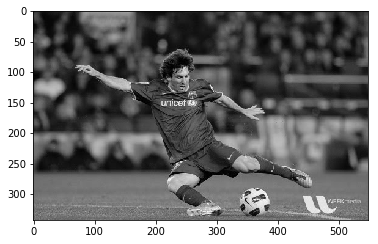

In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Load an color image in grayscale
img = cv2.imread('messi5.jpg',0)
plt.imshow(img,cmap='gray')
plt.show()

<A HREF="http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=cv2.destroy#cv2.destroyAllWindows" target="_blank">cv2.waitKey(n)</A>は、キーボード入力を`n` ms(ミリ秒)待ち、 その間にキーが入力されれば次の処理を行う関数．`n`の値として 0 を指定した時は，キー入力を無期限で待ち続ける． 以下で説明するように，特定のキー入力のみを待つ(例えば `a`の入力だけを受け付ける)ようにすることも可能

<A HREF="http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=cv2.destroy#cv2.destroyAllWindows"  target="_blank">cv2.destroyAllWindows()</A> は現在までに作られた全ての ウィンドウを閉じる関数．特定のウィンドウだけを閉じたい場合は、 `window_name`にそのウィンドゥの名前を与えて、 <A HREF="http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=cv2.destroy#cv2.destroyWindow"  target="_blank">cv2.destroyWindow(window_name)</A> 関数を実行する.

<font color='blue'>Note</font>
あらかじめウィンドウを作成しておき、後から読み込んだ画像を表示させたい場合cv2.namedWindow(window_name, flag) を用いる。 この第1引数 window_nameはウィンドゥの名前であり、 第2引数flagにはデフォルト値として cv2.WINDOW_AUTOSIZEが指定されている． これは画像のサイズに合わせてウィンドゥのサイズが自動変更されるというフラグである。 またflagに cv2.WINDOW_NORMAL を指定すると，ユーザーがサイズを変更できるウィンドウが作成される。 この機能は，画像のサイズが非常に大きい時やウィンドウにトラックバーを追加する時などに便利．

実行例: (Notebookの場合は使用しないほうが良い)

In [3]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Notebookの場合はこれが必要
for _ in range(5):
    cv2.waitKey(1)

## 画像をファイルに保存する

画像をファイルに保存するには cv2.imwrite(path, img) 関数を使う．

* 第1引数pathには画像のファイル名へのパス. cv2.imread() 関数と同じく、ファイル名の拡張子によってコーデック(画像保存方式)が選ばれる。 以下の拡張子が使える:
```
jpg, jpeg, jpe, jp2, png, webp, bmp, pbm, pgm, ppm, 
pxm, pnm,  sr, ras, tiff, tif, exr, hdr, pic, dib 
```
* 第2引数imgには保存したい画像データを指定する

実行例: これにより，変数imgに記憶されている画像データがPNGファイル形式で作業ディレクトリに保存される


In [3]:
cv2.imwrite('messigray.png',img)

True

## まとめる
以下が画像ファイルmessi5.jpgから画像をグレースケール(白黒)画像として読み込み，imageという名前のウィンドウに表示した後， ‘s’ というキーを押せば画像をmessigray.pngファイルに保存し、ESC を押せば画像を保存せずに終了するプログラム: (コード, messi5.jpg. 注意: Ubuntuの下でのAnaconda Python3.5ではcv2.imshowを使うとエラーになることがある。その場合python2を使うか、次に述べるmatplotlibを使う)

In [4]:
import numpy as np
import cv2

img = cv2.imread('messi5.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0)  & 0xFF 
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s') : # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()

# Notebookの場合はこれが必要
for _ in range(5):
    cv2.waitKey(1)


<font color="red">Warning</font> 64 bit マシンを使っている場合， k = cv2.waitKey(0) の部分を k = cv2.waitKey(0) & 0xFF と変更してください．

## Matplotlibを使った画像の表示
MatplotlibはPythonのデータの可視化用ライブラリで，様々なデータの可視化方法を提供している．ここでは，Matplotlibを使った画像の表示方法を学ぶ．Matplotlibを使えば，画像のズームや保存ができる : (コード)


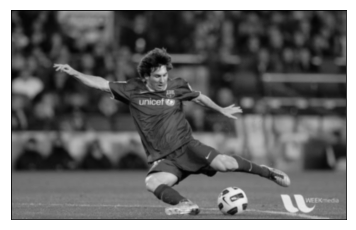

In [2]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

Matplotlibを使えば，多くのオプションが指定できる．詳細については Matplotlib のドキュメントを参照すること．ただし、機能のいくつかはこのチュートリアルで扱う．

<font color="red">Warning</font>
OpenCVで読み込んだカラー画像はBGR(青-緑-赤)モードで読み込まれる．しかし， Matplotlib は画像をRGB(赤-緑-青)モードで表示する．そのため，OpenCVを使って読み込んだ画像を表示しようとすると，色成分がおかしな表示になる．詳細については以下のexercisesを参照すること．

## 補足資料
Matplotlib プロットの種類と特徴(英語) http://matplotlib.org/api/pyplot_api.html

## 課題
OpenCVで読み込んだカラー画像をMatplotLibを使って表示すると変な表示になってしまう．このディスカッション を読み，その理由を考えよ．


# 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVのGUI機能<BR>
画像と動画の表示方法と保存方法，およびGUIの機能であるマウスとトラックバーの作り方を学ぶ
* 次の学習項目: [動画を扱う video.ipynb](  http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/video.html)<BR>
動画の再生方法，カメラを使った撮影方法と動画ファイルとしての保存方法を学ぶ．